In [2]:
import os
import random
from shutil import copy2

# Set the source directory where all the images are initially present
source_dir = "rawdata"

# Set the target directories where the split data will be stored
target_dir = "splitted_data"
train_dir = os.path.join(target_dir, "Train")
test_dir = os.path.join(target_dir, "Test")
val_dir = os.path.join(target_dir, "Validation")

# Create the target directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get a list of all categories
categories = os.listdir(source_dir)

# Define the split ratios (adjust as needed)
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Loop through each category
for category in categories:
    source_category_dir = os.path.join(source_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    # Create the category directories in the target directories
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)

    # Get a list of all image files in the source category directory
    image_files = os.listdir(source_category_dir)
    random.shuffle(image_files)  # Shuffle the list of files

    # Split the files into train, test, and validation sets
    num_files = len(image_files)
    num_train = int(num_files * train_ratio)
    num_test = int(num_files * test_ratio)

    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train + num_test]
    val_files = image_files[num_train + num_test:]

    # Copy the files to the respective target directories
    for file in train_files:
        source_file = os.path.join(source_category_dir, file)
        target_file = os.path.join(train_category_dir, file)
        copy2(source_file, target_file)

    for file in test_files:
        source_file = os.path.join(source_category_dir, file)
        target_file = os.path.join(test_category_dir, file)
        copy2(source_file, target_file)

    for file in val_files:
        source_file = os.path.join(source_category_dir, file)
        target_file = os.path.join(val_category_dir, file)
        copy2(source_file, target_file)

print("Data splitting completed successfully!")

Data splitting completed successfully!


In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

source_dir = "splitted_data"
categories = [
              "Corn__common_rust", "Corn__gray_leaf_spot", "Corn__healthy",
              "Corn__northern_leaf_blight", "Soybean__bacterial_blight",
              "Soybean__caterpillar", "Soybean__diabrotica_speciosa",
              "Soybean__downy_mildew", "Soybean__healthy", "Soybean__mosaic_virus",
              "Soybean__powdery_mildew", "Soybean__rust", "Soybean__southern_blight",
              "Tomato__bacterial_spot", "Tomato__early_blight", "Tomato__healthy",
              "Tomato__late_blight", "Tomato__leaf_mold", "Tomato__mosaic_virus",
              "Tomato__septoria_leaf_spot", "Tomato__spider_mites_(two_spotted_spider_mite)",
              "Tomato__target_spot", "Tomato__yellow_leaf_curl_virus",
              "Potato__early_blight", "Potato__healthy", "Potato__late_blight"]

for category in categories:
    train_files = os.path.join(source_dir, "Train", category)
    test_files = os.path.join(source_dir, "Test", category)
    valid_files = os.path.join(source_dir, "Validation", category)

    print(f"Number of {category} leaf images in training set", total_files(train_files))
    print(f"Number of {category} leaf images in test set", total_files(test_files))
    print(f"Number of {category} leaf images in validation set", total_files(valid_files))
    print("========================================================")

Number of Corn__common_rust leaf images in training set 1181
Number of Corn__common_rust leaf images in test set 476
Number of Corn__common_rust leaf images in validation set 248
Number of Corn__gray_leaf_spot leaf images in training set 990
Number of Corn__gray_leaf_spot leaf images in test set 392
Number of Corn__gray_leaf_spot leaf images in validation set 213
Number of Corn__healthy leaf images in training set 1060
Number of Corn__healthy leaf images in test set 417
Number of Corn__healthy leaf images in validation set 219
Number of Corn__northern_leaf_blight leaf images in training set 1118
Number of Corn__northern_leaf_blight leaf images in test set 441
Number of Corn__northern_leaf_blight leaf images in validation set 237
Number of Soybean__bacterial_blight leaf images in training set 49
Number of Soybean__bacterial_blight leaf images in test set 18
Number of Soybean__bacterial_blight leaf images in validation set 10
Number of Soybean__caterpillar leaf images in training set 300

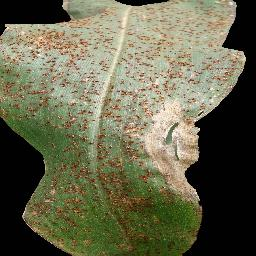

In [3]:
from PIL import Image
import IPython.display as display

image_path = 'splitted_data\\Train\\Corn__common_rust\\image (104).jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

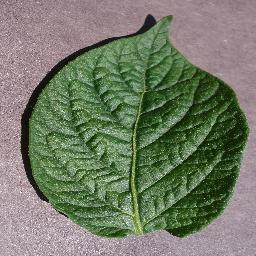

In [4]:
image_path = 'splitted_data/Train/Potato__healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.jpg'
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('splitted_data/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('splitted_data/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 31845 images belonging to 26 classes.
Found 6698 images belonging to 26 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))  # Increase filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the hyperparameters
epochs = 12
batch_size = 32
validation_batch_size = 64

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:


# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=validation_generator,
    validation_batch_size=validation_batch_size,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/12
996/996 [==============================] - 1515s 2s/step - loss: 1.1268 - accuracy: 0.6472 - val_loss: 0.9083 - val_accuracy: 0.7084 - lr: 0.0010
Epoch 2/12
996/996 [==============================] - 1415s 1s/step - loss: 0.5689 - accuracy: 0.8106 - val_loss: 0.5195 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 3/12
996/996 [==============================] - 1372s 1s/step - loss: 0.4473 - accuracy: 0.8489 - val_loss: 0.4187 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 4/12
996/996 [==============================] - 1295s 1s/step - loss: 0.3861 - accuracy: 0.8684 - val_loss: 0.4408 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 5/12
996/996 [==============================] - 1317s 1s/step - loss: 0.3283 - accuracy: 0.8882 - val_loss: 0.3080 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 6/12
996/996 [==============================] - 1305s 1s/step - loss: 0.3021 - accuracy: 0.8955 - val_loss: 0.4143 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 7/12
996/996 [==============================] - 1304

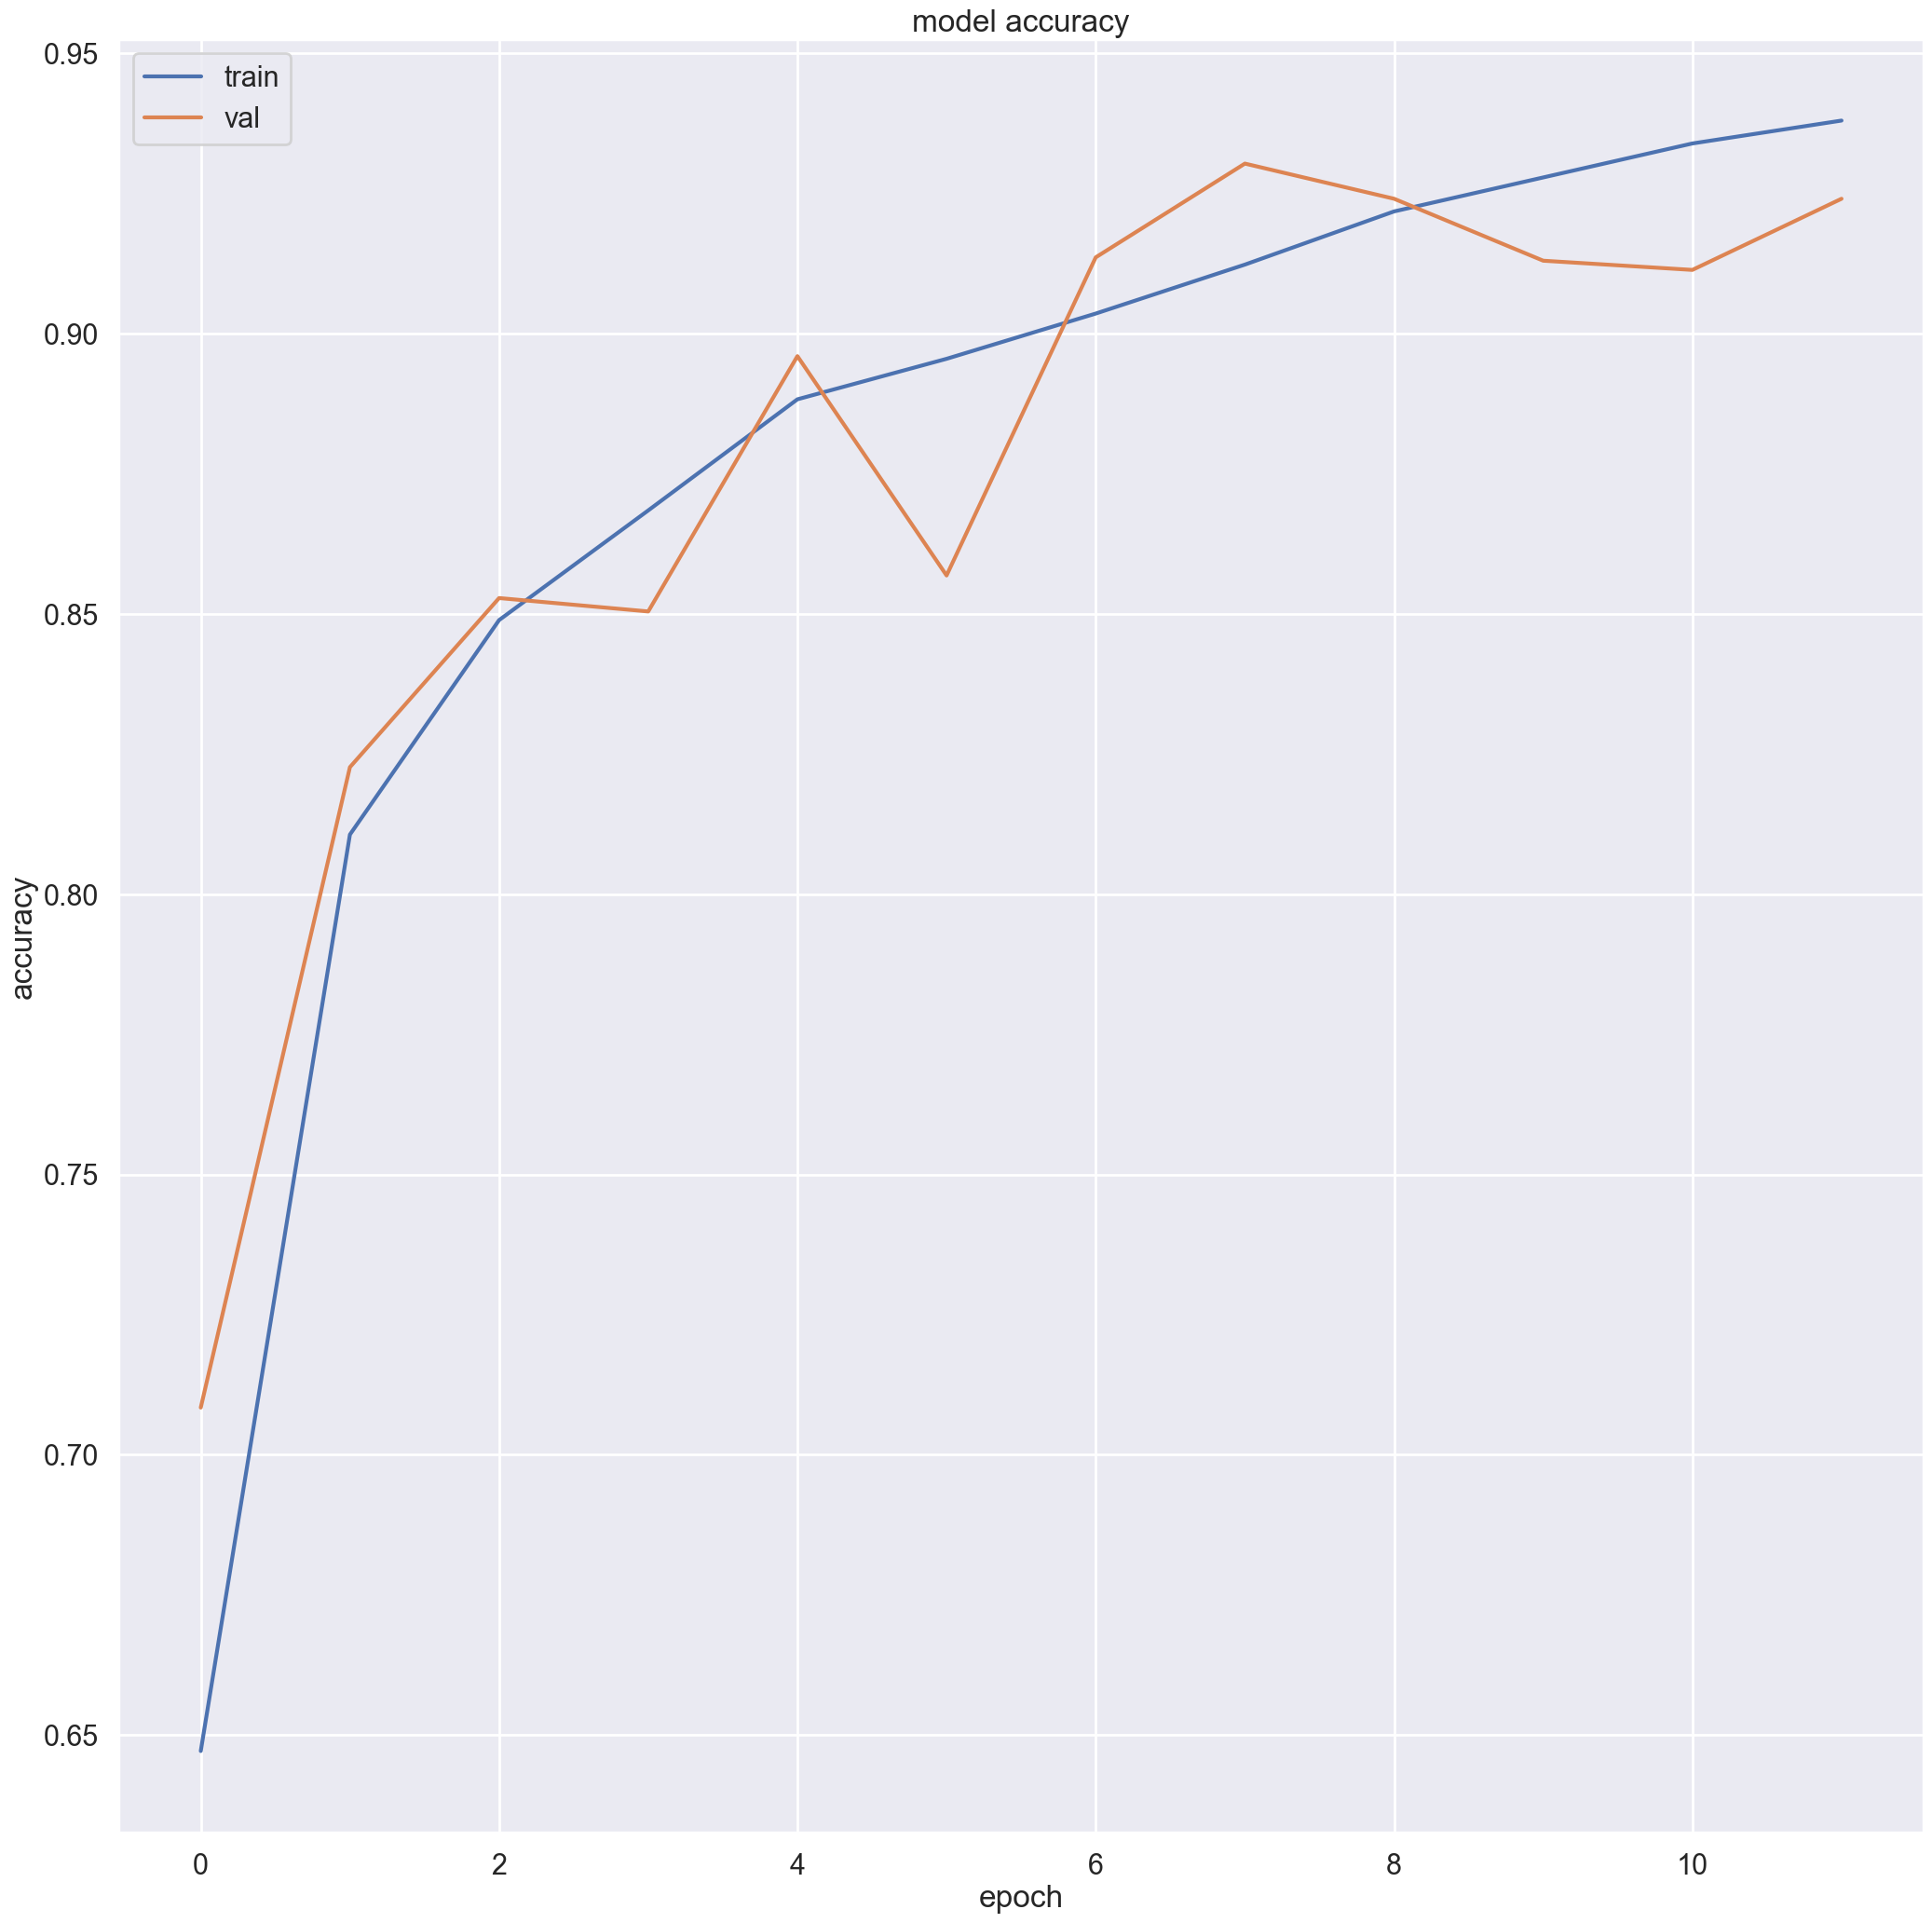

In [10]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [17]:
model.save("main_model.h5")

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x


# Yellow
x = preprocess_image('splitted_data\Test\Corn__common_rust\Corn rust leaf (3).jpg')

In [14]:
predictions = model.predict(x)
print(len(predictions))
predictions[0]

1/1 [==============================] - 0s 127ms/step
1


array([9.80261445e-01, 1.02417183e-03, 2.54679385e-11, 1.23311300e-02,
       1.80300587e-04, 9.48822798e-10, 2.42898052e-04, 1.41732266e-06,
       3.84162786e-06, 1.18287035e-05, 3.97278122e-08, 1.57584418e-05,
       4.24531981e-12, 1.63545844e-09, 1.46729553e-05, 1.63666844e-10,
       1.23639489e-04, 2.93446237e-06, 7.14016217e-16, 8.72101227e-04,
       4.90367273e-03, 8.65905334e-11, 1.01157157e-05, 5.07420883e-10,
       3.11014298e-10, 2.36952467e-08], dtype=float32)

In [15]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Corn__common_rust',
 1: 'Corn__gray_leaf_spot',
 2: 'Corn__healthy',
 3: 'Corn__northern_leaf_blight',
 4: 'Potato__early_blight',
 5: 'Potato__healthy',
 6: 'Potato__late_blight',
 7: 'Soybean__bacterial_blight',
 8: 'Soybean__caterpillar',
 9: 'Soybean__diabrotica_speciosa',
 10: 'Soybean__downy_mildew',
 11: 'Soybean__healthy',
 12: 'Soybean__mosaic_virus',
 13: 'Soybean__powdery_mildew',
 14: 'Soybean__rust',
 15: 'Soybean__southern_blight',
 16: 'Tomato__bacterial_spot',
 17: 'Tomato__early_blight',
 18: 'Tomato__healthy',
 19: 'Tomato__late_blight',
 20: 'Tomato__leaf_mold',
 21: 'Tomato__mosaic_virus',
 22: 'Tomato__septoria_leaf_spot',
 23: 'Tomato__spider_mites_(two_spotted_spider_mite)',
 24: 'Tomato__target_spot',
 25: 'Tomato__yellow_leaf_curl_virus'}

In [16]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Corn__common_rust
